# IST 652 - Lecture 8A

-----

## Explore:
- Introduction to Semistructured Data
- Introduction to WebSraping
    - HTML
    - Requests
    - BeautifulSoup

---

## Goodbye Rows and Columns

In our previous section, we saw that <b><u>structured data</b></u> is typically represented in tables, databases or in common files, where the data is expected to conform to a known structure (in databases this would be the <b><u>schema</b></u>):
- <b> i.e. rows and columns </b>

In semi-structured data, the data is well-formatted within a tag system.

The structure is not set in advance, but instead, the sequence and hierarchy of tags describe the structure of the data.

In particular, data elements can be described by the same tag, but may not have the same attributes or shape as other elements of that tag.
- Sometimes the use of tags to describe the data structure is referred to as “self-describing data”.

#### Some Types pf Semi-structured Data:
- <b>XML</b>: https://en.wikipedia.org/wiki/XML
- <b>HTML</b>: https://en.wikipedia.org/wiki/HTML
- <b>JSON</b>: https://en.wikipedia.org/wiki/JSON
    - <b>Avro</b>: https://en.wikipedia.org/wiki/Apache_Avro
- <b>Parquet</b>: https://en.wikipedia.org/wiki/Apache_Parquet
- <b>RCFile</b>: https://en.wikipedia.org/wiki/RCFile
- <b>ORC</b>: https://en.wikipedia.org/wiki/Apache_ORC

### In the semi-structured section of this course, we will cover:
- The basics of web scraping to handle <b>HTML</b> and <b>XML</b> data.
- Obtaining <b>JSON</b> data from the social media API’s for Twitter and Facebook
- Unicode issues
- How to store this data in the NoSQL database MongoDB

----

## Web Scraping (Lite)

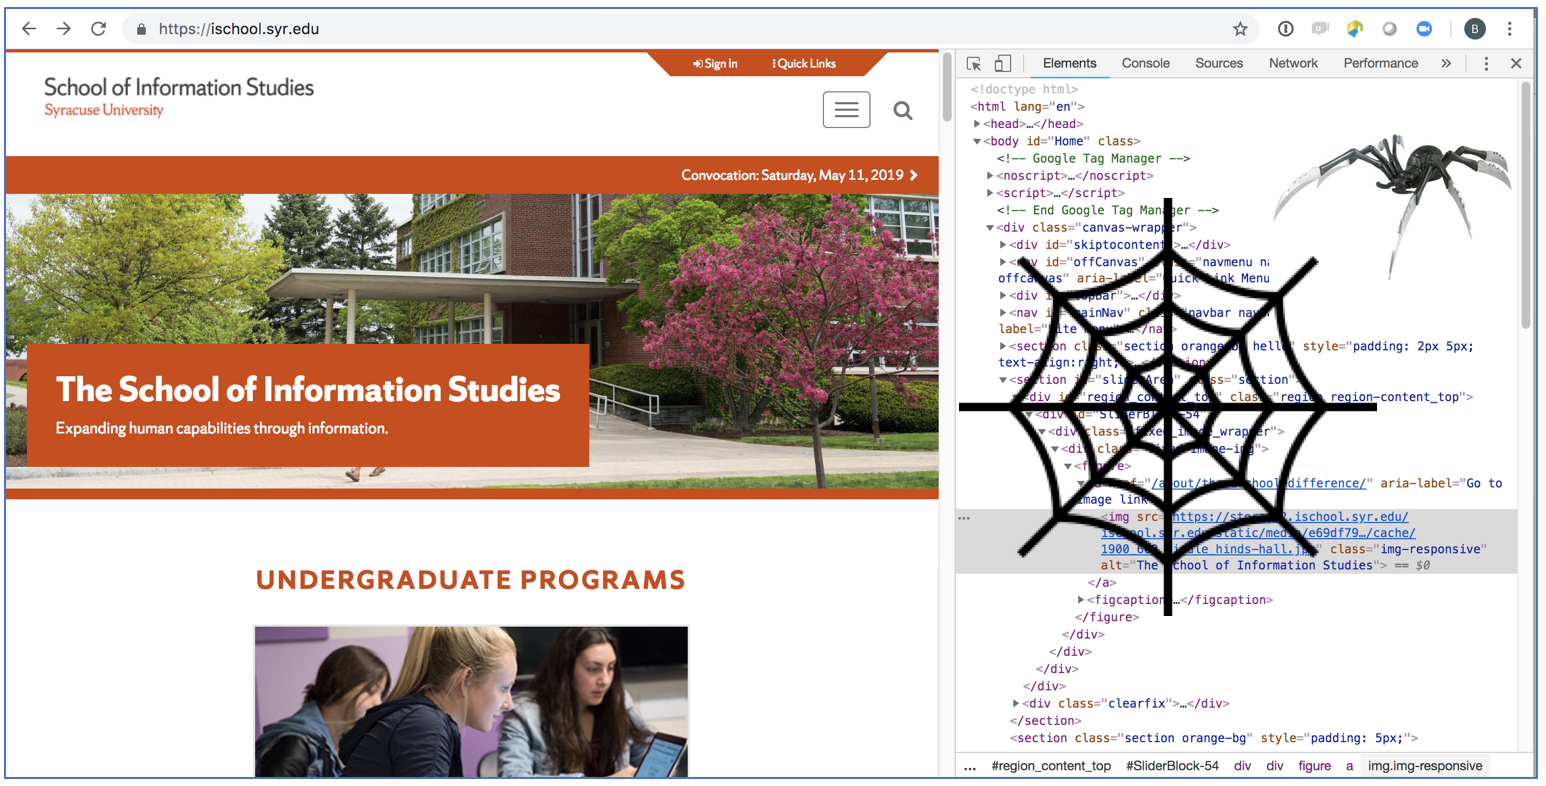

- The current use of the term web scraping seems to encompass downloading data directly from the web URL’s, including things like RSS feeds, and using HTML and XML formats.

- The term does not seem to include obtaining data through various API’s, such as the social media API’s, which we are also going to cover in this section of the course.

### As a matter of opinion:
- In the real world, getting data from HTML pages should be considered a last resort if you can’t get the data through the site's APIs.
    - It cannot be guarenteed that a website structure or content will persist from one day to the next.
    - Additionally, you should read carefully a website's terms of service as not to be in violation when scraping data

In this section of the course, we will discuss python libraries to download HTML and XML, respectively, showing how to parse and represent data that appears directly in the download.

We are not going to cover more advanced topics in web scraping:<i>
- Copyright and Trademarks
- JavaScript Injection
- Bots / Web-crawlers
</i>

Since much web content is not explicitly on the main web page, but pulled in through javascript functions, the topic can also involve secondary requests to the http service from a web page, such as sending cookie information or interacting with the web page to pull down additional content.
- For example, there is a package Selenium that handles browser-based parsing for those types of operations.  Advanced web scraping may also include how to write bots to automatically follow links and collect more data.


----

## HTML
- HypterText Markup Language
- Standard langauge for formatting websites

There are many references and tutorials for HTML, here are two:
- Mozilla Developer Network: https://developer.mozilla.org/en-US/docs/Web/HTML
- W3C (World Wide Web Consortium):  http://www.w3schools.com/tags/

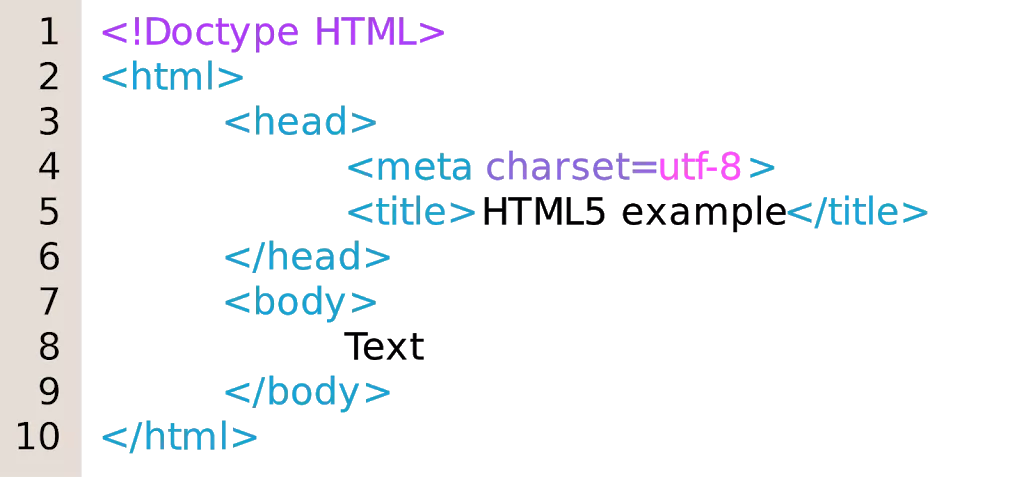

---

This simple example is nicely organized by white space that coincides with the structure of the document.

But this is not mandatory, and many HTML documents typically put many tags on one line, or otherwise make different uses of space and newlines which are ignored by the browser.

This emphasizes the point that the tags show the representation of the data, but that there is separate aspect to HTML for the presentation by the browser.

Since the typical use of HTML is to be interpreted by a browser, the markup language has been strongly influenced by browser interpretations over time.
The most notable one of these is that browsers often interpret tag structure, even when it is not well-formed.
- For example, it is quite common not to put ending tags on paragraphs <b>< p ></b> or list elements <b>< li ></b>.

## URLib
- https://docs.python.org/3/howto/urllib2.html
- But we can use this package to connect with web servers using the <b>HTTP</b> protocol.

- The main types of data used by urllib are the <b>Request</b> and <b>Response</b>, mirroring the <b>request/response</b> structure of connecting with web servers.

- The urllib requests can build <b>GET</b> and <b>POST</b> requests that may include additional information besides the actual URL, which will be encoded after the <b>?</b> in the URL request.

### What is the difference between Get and Post?
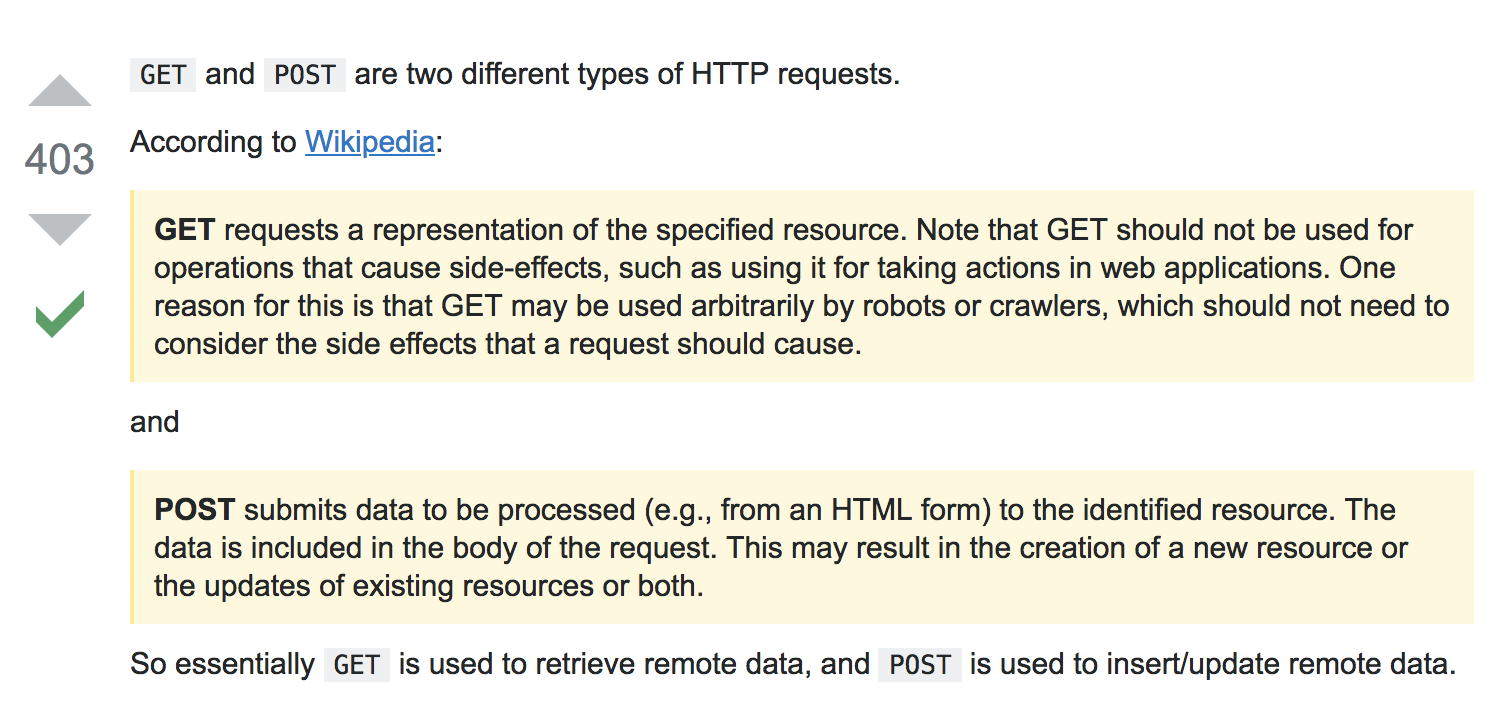

One standard use of this library is to:
- (1) Use <b>urlopen</b> to past the request to the server
- (2) Use the <b>read()</b> function on the response which returns the text of the response

---

### Let's Try This on a Newspaper Story

In [2]:
from urllib import request

In [4]:
bbcurl = "https://www.bbc.com/news/av/technology-47535911/web-creator-discusses-what-went-wrong"

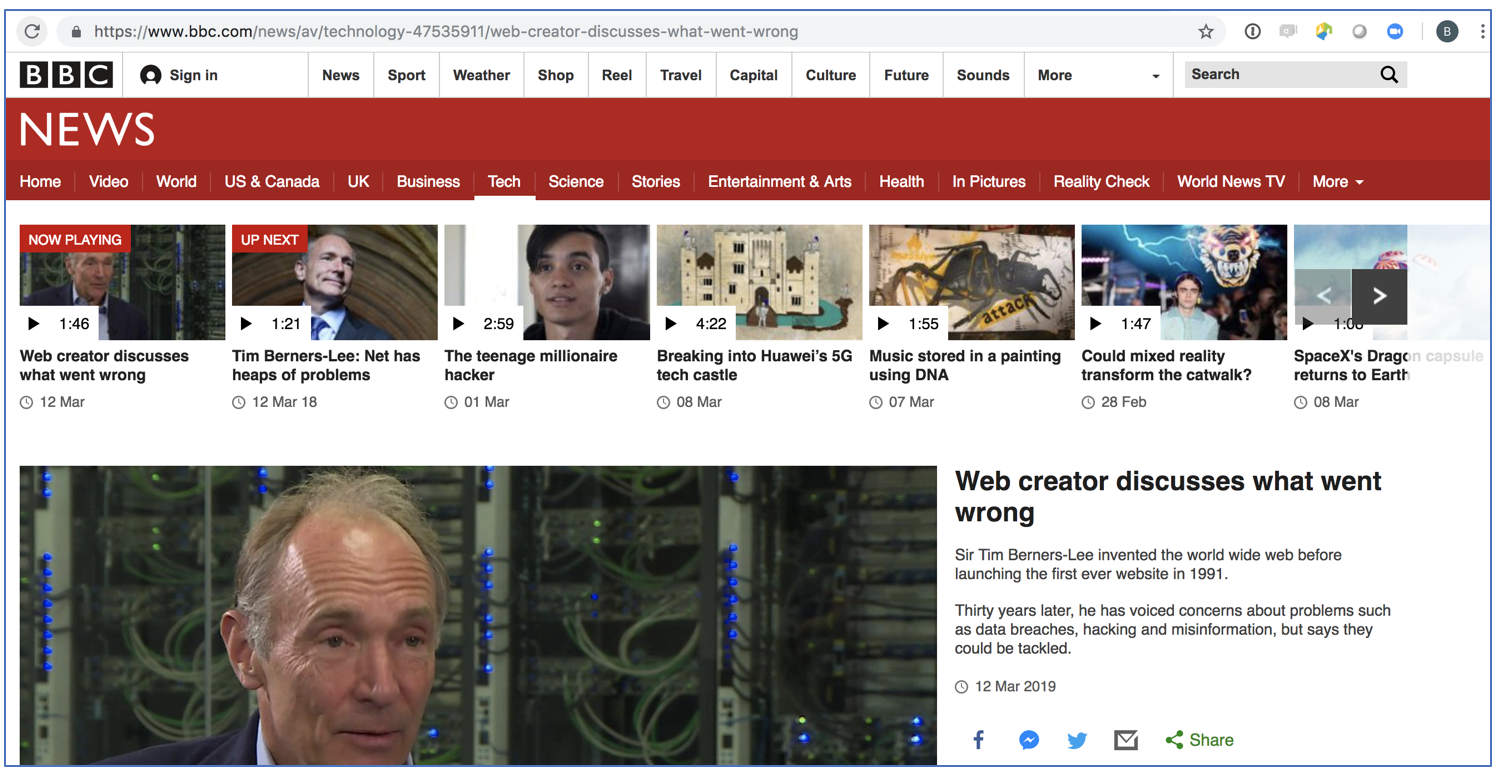

In [3]:
response = request.urlopen(bbcurl)
type(response)

http.client.HTTPResponse

If we just read the response, we get a sequence of bytes, so instead we decode it to convert it to a python string.

In [5]:
html = response.read().decode('utf8')
type(html)

str

In [10]:
print(html[:500])



<!DOCTYPE html>
<html lang="en" id="responsive-news">
<head  prefix="og: http://ogp.me/ns#">
    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=1">
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
    <title>Web creator discusses what went wrong - BBC News</title>
    <meta name="description" content="Sir Tim Berners-Lee says he feels problems such as data breaches, hacking and misinformation can be tackled.">
    


### BeautifulSoup
- The Python package BeautifulSoup will parse the HTML document to find its structure, fixing any non-well-formed tag structure as best it can.
    - http://www.crummy.com/software/BeautifulSoup/bs4/doc/
    - An alterntive package - lxml: https://lxml.de/

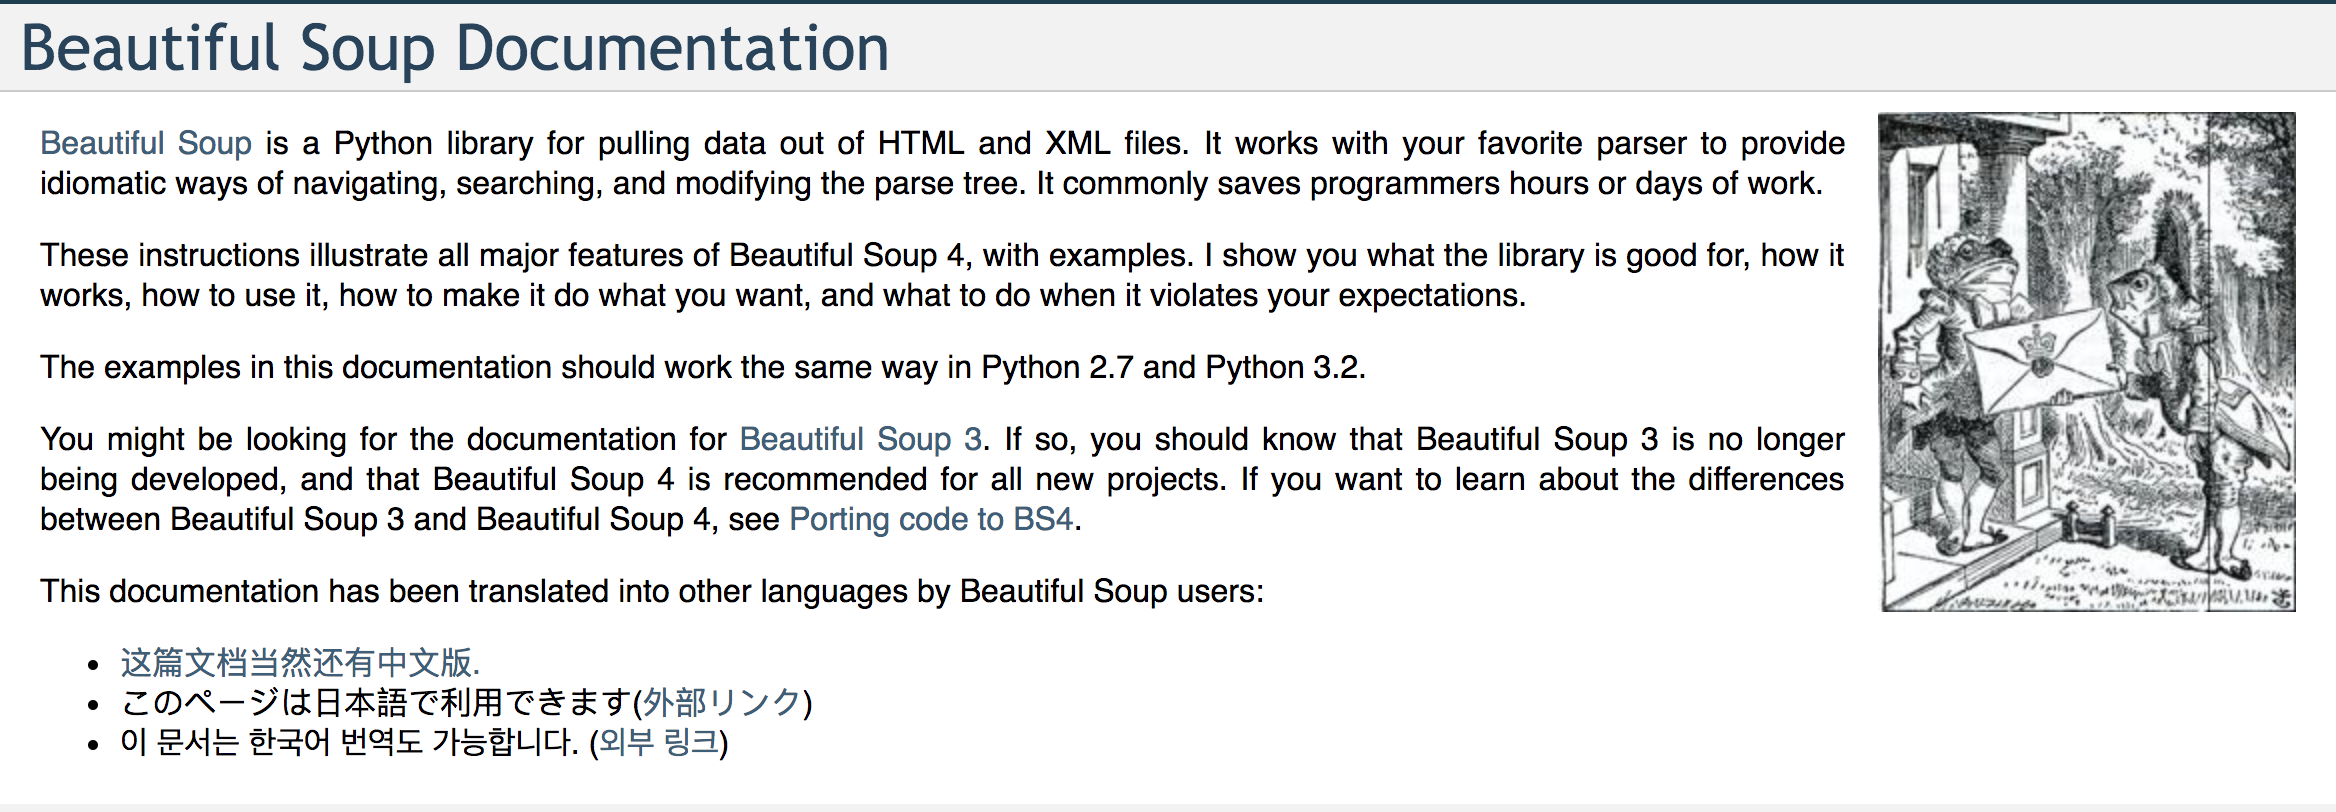

#### The typical use is to use the BeautifulSoup parser on an html document to get a soup object

In [11]:
from bs4 import BeautifulSoup

In [12]:
htmlsoup = BeautifulSoup(html, 'html.parser')
type(htmlsoup)

bs4.BeautifulSoup

- A beautiful soup object corresponds to a tag.
- Every tag has:
- A name
- A value
- (possibly) some attributes
- (possibly) some children. 

- When you have a tag, you can get information about that as a node in the tree structure generated by the tags of the document.
- You can then navigate anything below that tag in the tree either by looking for specific tags or by following the children.

- So every tag and tag structure can be found from the object that we obtained from the parser.
- If you give the name of a tag, it will find the first instance of that tag.

In [14]:
firsttitle = htmlsoup.title
firsttitle

<title>Web creator discusses what went wrong - BBC News</title>

In [15]:
type(firsttitle)

bs4.element.Tag

In [18]:
print(firsttitle.name)

title


#### Use the get_text() function to get the actual tag content:

In [22]:
firsttitle.get_text()

'Web creator discusses what went wrong - BBC News'

### We can also use the find_all() function to return a Resultset of all the instances of a tag.

#### Let's find all instances of anchor tags
- An anchor tag is used to define the beginning and end of a hypertext link.
- Search engines use the tag to determine the subject matter of the destination URL.
- Users click on the anchor text to reach the link target.

In [23]:
anchors = htmlsoup.find_all('a')

In [25]:
type(anchors)

bs4.element.ResultSet

In [26]:
len(anchors)

287

In [27]:
print(anchors[:8])

[<a href="https://www.bbc.co.uk">Homepage</a>, <a href="#page">Skip to content</a>, <a href="/accessibility/" id="orb-accessibility-help">Accessibility Help</a>, <a href="https://account.bbc.com/account?ptrt=https://www.bbc.com/news/av/technology-47535911/web-creator-discusses-what-went-wrong" id="idcta-link"><span id="idcta-username">BBC Account</span></a>, <a class="js-notification-link animated three" href="#" id="notification-link" style="display: none"><span class="hidden-span">Notifications</span><div class="notification-link--triangle"></div><div class="notification-link--triangle"></div><span id="not-num"></span></a>, <a href="https://www.bbc.co.uk">Home</a>, <a href="https://www.bbc.co.uk/news">News</a>, <a href="https://www.bbc.co.uk/sport">Sport</a>]


#### For each anchor ( <u>a</u> ) tag, we use the <u><i>href</i></u> attribute to get the actual anchor part, where the result is converted to an actual string:

In [28]:
links = [str(link.get('href')) for link in htmlsoup.find_all('a')]
print(links[ :4])

['https://www.bbc.co.uk', '#page', '/accessibility/', 'https://account.bbc.com/account?ptrt=https://www.bbc.com/news/av/technology-47535911/web-creator-discusses-what-went-wrong']


#### Or we can look at the anchor strings to just get the ones starting with http:

In [30]:
outlinks = [link for link in links if link.startswith('http')]
print(outlinks[ :4])

['https://www.bbc.co.uk', 'https://account.bbc.com/account?ptrt=https://www.bbc.com/news/av/technology-47535911/web-creator-discusses-what-went-wrong', 'https://www.bbc.co.uk', 'https://www.bbc.co.uk/news']


These are examples of navigating the document using tags.  In addition, you can navigate the document using children functions to move in to the tag structure.

---

### Navigating with Children Functions

- Look at the example program to show how to get data from an HTML document.
- This example uses the ESPN web page for NCAA men’s basketball rankings.

In [33]:
ncaa_url = "http://www.espn.com/mens-college-basketball/rankings"

- To figure out how to get the data that you want from an HTML page, you need to inspect the HTML source for the page.
- For each browser, there are “developer tools” that you can turn on that allows you to see page sources, among other things.

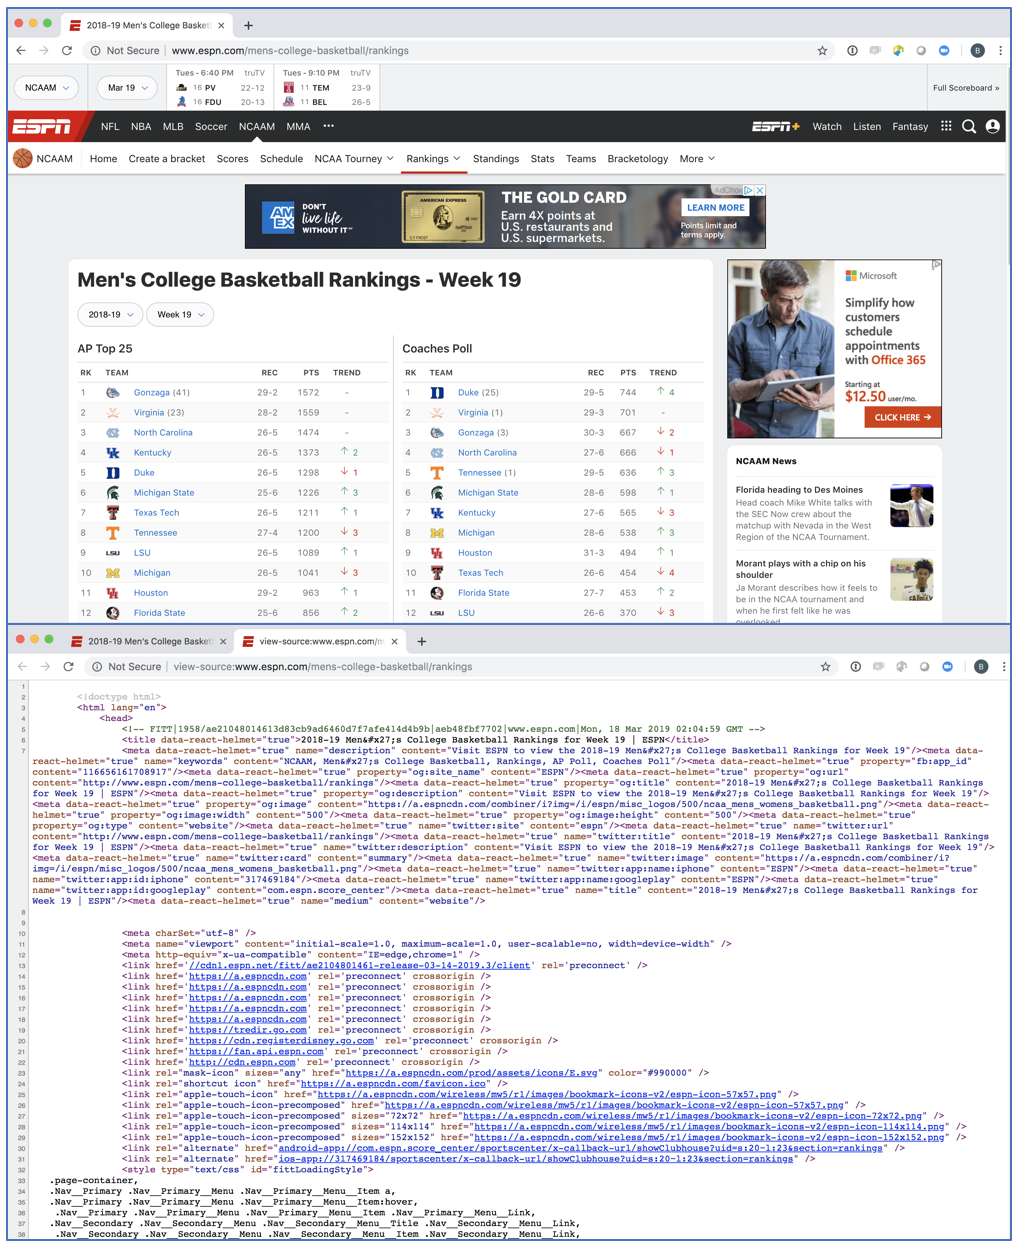

- Or you can use the prettify function in BeautifulSoup, in order to see what tags to collect.
- Note that once we get and save a tag, then we can access all its children tags and attributes directly from it.

In [36]:
ncaa_resp = request.urlopen(ncaa_url)

In [37]:
ncaa_html = ncaa_resp.read().decode('utf8')

In [39]:
ncaa_soup = BeautifulSoup(ncaa_html, 'html.parser')

In [43]:
ncaa_soup.prettify

<bound method Tag.prettify of 
<!DOCTYPE doctype html>

<html lang="en">
<head>
<!-- FITT|1958/ae21048014613d83cb9ad6460d7f7afe414d4b9b|aeb48fbf7702|www.espn.com|Mon, 18 Mar 2019 02:12:00 GMT -->
<title data-react-helmet="true">2018-19 Men's College Basketball Rankings for Week 19 | ESPN</title>
<meta content="Visit ESPN to view the 2018-19 Men's College Basketball Rankings for Week 19" data-react-helmet="true" name="description"/><meta content="NCAAM, Men's College Basketball, Rankings, AP Poll, Coaches Poll" data-react-helmet="true" name="keywords"/><meta content="116656161708917" data-react-helmet="true" property="fb:app_id"/><meta content="ESPN" data-react-helmet="true" property="og:site_name"/><meta content="http://www.espn.com/mens-college-basketball/rankings" data-react-helmet="true" property="og:url"/><meta content="2018-19 Men's College Basketball Rankings for Week 19 | ESPN" data-react-helmet="true" property="og:title"/><meta content="Visit ESPN to view the 2018-19 Men's Coll

In [54]:
ncaa_head = ncaa_soup.head
print(ncaa_head)

<head>
<!-- FITT|1958/ae21048014613d83cb9ad6460d7f7afe414d4b9b|aeb48fbf7702|www.espn.com|Mon, 18 Mar 2019 02:12:00 GMT -->
<title data-react-helmet="true">2018-19 Men's College Basketball Rankings for Week 19 | ESPN</title>
<meta content="Visit ESPN to view the 2018-19 Men's College Basketball Rankings for Week 19" data-react-helmet="true" name="description"/><meta content="NCAAM, Men's College Basketball, Rankings, AP Poll, Coaches Poll" data-react-helmet="true" name="keywords"/><meta content="116656161708917" data-react-helmet="true" property="fb:app_id"/><meta content="ESPN" data-react-helmet="true" property="og:site_name"/><meta content="http://www.espn.com/mens-college-basketball/rankings" data-react-helmet="true" property="og:url"/><meta content="2018-19 Men's College Basketball Rankings for Week 19 | ESPN" data-react-helmet="true" property="og:title"/><meta content="Visit ESPN to view the 2018-19 Men's College Basketball Rankings for Week 19" data-react-helmet="true" property="o

In [51]:
ncaa_head_children = [child for child in ncaa_head.children]

In [53]:
ncaa_head_children

['\n',
 ' FITT|1958/ae21048014613d83cb9ad6460d7f7afe414d4b9b|aeb48fbf7702|www.espn.com|Mon, 18 Mar 2019 02:12:00 GMT ',
 '\n',
 <title data-react-helmet="true">2018-19 Men's College Basketball Rankings for Week 19 | ESPN</title>,
 '\n',
 <meta content="Visit ESPN to view the 2018-19 Men's College Basketball Rankings for Week 19" data-react-helmet="true" name="description"/>,
 <meta content="NCAAM, Men's College Basketball, Rankings, AP Poll, Coaches Poll" data-react-helmet="true" name="keywords"/>,
 <meta content="116656161708917" data-react-helmet="true" property="fb:app_id"/>,
 <meta content="ESPN" data-react-helmet="true" property="og:site_name"/>,
 <meta content="http://www.espn.com/mens-college-basketball/rankings" data-react-helmet="true" property="og:url"/>,
 <meta content="2018-19 Men's College Basketball Rankings for Week 19 | ESPN" data-react-helmet="true" property="og:title"/>,
 <meta content="Visit ESPN to view the 2018-19 Men's College Basketball Rankings for Week 19" data

---

## Review:
- Introduction to Semistructured Data
    - Introduction to WebScraping
    - HTML
    - Requests
    - BeautifulSoup